# Create data files of qubits and gates properties

The data are stored in ``.csv`` files.

## Qubit properties

Headings:

- T1 (ms)
- T1_date	
- T2 (ms)
- T2_date
- frequency (MHz)
- frequency_date
- readout_error
- readout_error_date
- prob_meas0_prep1
- prob_meas0_prep1_date
- prob_meas1_prep0
- prob_meas1_prep0_date
- readout_length (us)
- readout_length_date

``_date`` is the date and time to measure the corresponding data. The format of date-time is ISO format, e.g., ``2023-12-27T10:32+08:00``.

If other unit system is preferred, please contact Yijia Zhou.

## Gate properties

Headings:

- qubits
- gate
- gate_error
- error_date
- gate_length (us)
- length_date
- name

``qubits`` list of the indices of the physical qubit(s) hit by the gate. E.g., `[0]` means the gate is applied to ``q0``, ``[0,1]`` means the gate is applied to ``q0`` and ``q1``. **Important Note: the set of qubits list in the input data file will be used to create the coupling map of the backend, and currently it will only recognize 2-qubit connections.**

``gate`` is the type of the gate and must by included in the standard gate library of qiskit.

``gate_error`` For 1Q gate, the input gate error is the sum of `X` and `Y` error. For 2Q gate, the input error is the sum of `IX`, `IY`, `XI`, `XX`, `XY`, `XZ`, `YI`, `YX`, `YY`, `YZ`, `ZX`, `ZY` errors.

``name`` It is only used to give the gate a unique name, not clear where it shall be used.

In [1]:
import pandas as pd
import random
from backend_build import now_time
pd.set_option('display.max_rows', 8)

## Create qubits_info and gates_info

In [2]:
n_qubits = 35
qubits_file_name = 'data/qubits_data_{}.csv'.format(n_qubits)
gates_file_name = 'data/gates_data_{}.csv'.format(n_qubits)


qubits_info = pd.DataFrame(columns=['T1','T1_date', 
                                    'T2','T2_date', 
                                    'frequency', 'frequency_date', 
                                    'readout_error', 'readout_error_date', 
                                    'prob_meas0_prep1','prob_meas0_prep1_date', 
                                    'prob_meas1_prep0', 'prob_meas1_prep0_date', 
                                    'readout_length', 'readout_length_date'])
for i in range(n_qubits):
    qubits_info.loc[i] = [abs(random.gauss(50e3, 1e3)), now_time(), # T1
                         abs(random.gauss(1000, 50)), now_time(),   # T2
                         abs(random.gauss(1, 0.05)), now_time(),    # frequency
                         abs(random.gauss(0.0001, 0.00002)), now_time(), # readout_error
                         abs(random.gauss(0.0001, 0.00002)), now_time(), # prob_0_1
                         abs(random.gauss(0.0001, 0.00002)), now_time(), # prob_1_0
                         abs(random.gauss(0.1, 0.01)), now_time(),] # readout_length

gates_info = pd.DataFrame(columns=['qubits',
                                   'gate',
                                   'gate_error', 'error_date',
                                   'gate_length', 'length_date',
                                   'name'])
iter = -1
for gate in ['id', 'r' ,'rz']:
    for j in range(n_qubits):
        iter += 1
        gates_info.loc[iter] = ['['+str(j)+']',
                                gate,
                                abs(random.gauss(0.00003, 0.000005)), now_time(), # 1qb gate error
                                random.gauss(150, 10), now_time(),
                                gate+str(j)]
for gate in ['rzz']:
    for i in range(n_qubits):
        for j in list(range(i))+list(range(i+1,n_qubits)):
            error_2qb = abs(random.gauss(0.002, 0.0003))
            # if abs(j-i) < 3:
            #     error_2qb = abs(random.gauss(0.0045, 0.0005)) # 2qb gate error (|j-i|=1)
            # elif abs(j-i) < 7:
            #     error_2qb = abs(random.gauss(0.01, 0.002)) # 2qb gate error (|j-i|=2,3,4)
            # else:
            #     continue
            iter += 1
            gates_info.loc[iter] = ['['+str(i)+','+str(j)+']',
                                    gate,
                                    error_2qb, now_time(), # 2qb gate error
                                    abs(random.gauss(150, 10)), now_time(),
                                    gate+str(i)+'_'+str(j)]

with open(qubits_file_name, 'w') as f:
    qubits_info.to_csv(f, index=False, lineterminator='\n')
with open(gates_file_name, 'w') as f:
    gates_info.to_csv(f, index=False, lineterminator='\n')

display(qubits_info)
display(gates_info)

,T1,T1_date,T2,T2_date,frequency,frequency_date,readout_error,readout_error_date,prob_meas0_prep1,prob_meas0_prep1_date,prob_meas1_prep0,prob_meas1_prep0_date,readout_length,readout_length_date
0,50971.445448,2024-01-05T15:53+08:00,998.506776,2024-01-05T15:53+08:00,0.929141,2024-01-05T15:53+08:00,0.000098,2024-01-05T15:53+08:00,0.000135,2024-01-05T15:53+08:00,0.000085,2024-01-05T15:53+08:00,0.112192,2024-01-05T15:53+08:00
1,49540.022339,2024-01-05T15:53+08:00,933.329473,2024-01-05T15:53+08:00,1.033728,2024-01-05T15:53+08:00,0.000134,2024-01-05T15:53+08:00,0.000116,2024-01-05T15:53+08:00,0.000093,2024-01-05T15:53+08:00,0.108139,2024-01-05T15:53+08:00
2,50131.612682,2024-01-05T15:53+08:00,992.794872,2024-01-05T15:53+08:00,0.908138,2024-01-05T15:53+08:00,0.000103,2024-01-05T15:53+08:00,0.000096,2024-01-05T15:53+08:00,0.000093,2024-01-05T15:53+08:00,0.087588,2024-01-05T15:53+08:00
3,50826.624584,2024-01-05T15:53+08:00,932.532771,2024-01-05T15:53+08:00,1.042862,2024-01-05T15:53+08:00,0.000085,2024-01-05T15:53+08:00,0.000097,2024-01-05T15:53+08:00,0.000126,2024-01-05T15:53+08:00,0.112455,2024-01-05T15:53+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,51565.695100,2024-01-05T15:53+08:00,996.748980,2024-01-05T15:53+08:00,0.962144,2024-01-05T15:53+08:00,0.000121,2024-01-05T15:53+08:00,0.000070,2024-01-05T15:53+08:00,0.000098,2024-01-05T15:53+08:00,0.108746,2024-01-05T15:53+08:00
32,49935.889867,2024-01-05T15:53+08:00,1052.188276,2024-01-05T15:53+08:00,1.057852,2024-01-05T15:53+08:00,0.000104,2024-01-05T15:53+08:00,0.000070,2024-01-05T15:53+08:00,0.000112,2024-01-05T15:53+08:00,0.116334,2024-01-05T15:53+08:00
33,49671.771004,2024-01-05T15:53+08:00,1013.018089,2024-01-05T15:53+08:00,1.032492,2024-01-05T15:53+08:00,0.000100,2024-01-05T15:53+08:00,0.000142,2024-01-05T15:53+08:00,0.000098,2024-01-05T15:53+08:00,0.115861,2024-01-05T15:53+08:00
34,50689.225392,2024-01-05T15:53+08:00,1028.686720,2024-01-05T15:53+08:00,1.052387,2024-01-05T15:53+08:00,0.000137,2024-01-05T15:53+08:00,0.000069,2024-01-05T15:53+08:00,0.000112,2024-01-05T15:53+08:00,0.105463,2024-01-05T15:53+08:00


,qubits,gate,gate_error,error_date,gate_length,length_date,name
0,[0],id,0.000046,2024-01-05T15:53+08:00,161.202409,2024-01-05T15:53+08:00,id0
1,[1],id,0.000034,2024-01-05T15:53+08:00,157.622431,2024-01-05T15:53+08:00,id1
2,[2],id,0.000026,2024-01-05T15:53+08:00,165.730125,2024-01-05T15:53+08:00,id2
3,[3],id,0.000033,2024-01-05T15:53+08:00,154.567675,2024-01-05T15:53+08:00,id3
...,...,...,...,...,...,...,...
1291,"[34,30]",rzz,0.001638,2024-01-05T15:53+08:00,163.548672,2024-01-05T15:53+08:00,rzz34_30
1292,"[34,31]",rzz,0.002193,2024-01-05T15:53+08:00,146.155165,2024-01-05T15:53+08:00,rzz34_31
1293,"[34,32]",rzz,0.002467,2024-01-05T15:53+08:00,146.855014,2024-01-05T15:53+08:00,rzz34_32
1294,"[34,33]",rzz,0.002085,2024-01-05T15:53+08:00,139.070165,2024-01-05T15:53+08:00,rzz34_33


## Show the error distribution

The left narrow peak is the errors of 1Q gates, the wide peaks are errors of 2Q gates.

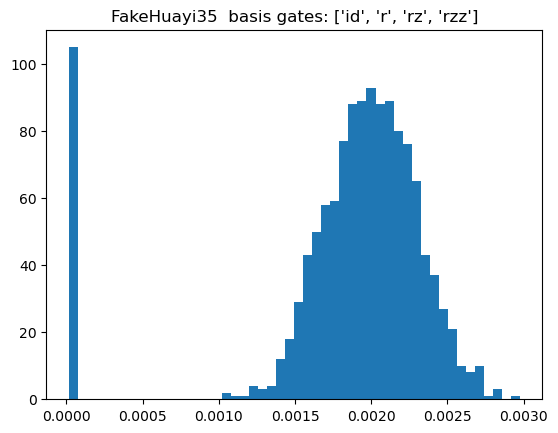

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

for n in [35]:
    data = pd.read_csv(f"./data/gates_data_{n}.csv")
    basis_gates = list(data["gate"].drop_duplicates())
    plt.hist(data["gate_error"], bins=50)
    plt.title(f"FakeHuayi{n}  basis gates: {basis_gates}")
    plt.show()


# data = pd.read_csv(f"./data/gates_data_32_lower.csv")
# basis_gates = list(data["gate"].drop_duplicates())
# plt.hist(data["gate_error"], bins=50)
# plt.title(f"FakeHuayi32_LE  basis gates: {basis_gates}")
# plt.show()


# data = pd.read_csv(f"./data/gates_data_32_lower_rzz.csv")
# basis_gates = list(data["gate"].drop_duplicates())
# plt.hist(data["gate_error"], bins=50)
# plt.title(f"FakeHuayi32_LE_RZZ  basis gates: {basis_gates}")
# plt.show()